<a href="https://colab.research.google.com/github/DataWhizAnushka/ds_assignments/blob/main/PRACTICING__EDA12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DAY 2**

## IN DATA ANALYSIS WHAT ALL THING WE DO
1. MISSING ValuE
2. EXPLORE ABOUT THE NUMERICAL VARIABLES
3. EXPLORE ABOUT CATEGORICAL VARIABLES
4. FINDING RELATIONSHP BETWEEN FEATURES

**BLACK FRIDAY DATASET EDA AND FEATURE ENGINEERING**


CLEANING AND PREPAREING THE DATA FOR MODEL TRAINING

**Problem Statement**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
## IMPORTING THE DATASET
df_train= pd.read_csv('train.csv.zip')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_train.shape

(550068, 12)

In [ ]:
## import the test data
df_test= pd.read_csv('test.csv.zip')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
## merge both train and test data
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
## basis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
pd.get_dummies(df['Gender'])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,True,False


HANDLING CATEGORICAL FEATURE

In [ ]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
## Handle categorial feature age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
## pd.get_dummies(df['Age'], drop_first=True)


In [ ]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})


In [ ]:
##second technqiue
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()


array([0, 6, 2, 4, 5, 3, 1])

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [ ]:
df= pd.concat([df,df_city],axis=1)

In [ ]:
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,1000001,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,False,False
3,1000001,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,False,False
4,1000002,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,False,True


missing values

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809


In [ ]:
## Focus on replacing missing value
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [ ]:
## replacing the missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2']).mode()[0]

In [ ]:
df['Product_Category_2'].isnull().sum()

0

In [ ]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,46469
15.0,39968
14.0,26283
17.0,23818
5.0,23799
8.0,17861
9.0,16532
12.0,13115
13.0,7849


In [ ]:
## replacing the missing value with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3']).mode()[0]

In [ ]:
df['Product_Category_3'].isnull().sum()

0

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,False,False
1,1000001,P00248942,0,0,10,2,0,1,8.0,16.0,15200.0,False,False
2,1000001,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,False,False
3,1000001,P00085442,0,0,10,2,0,12,8.0,16.0,1057.0,False,False
4,1000002,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,False,True


In [ ]:
df.shape

(783667, 13)

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'].str.replace('+','')

,Stay_In_Current_City_Years
0,2
1,2
2,2
3,2
4,4
...,...
783662,4
783663,4
783664,4
783665,4


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,False,False
1,1000001,P00248942,0,0,10,2,0,1,8.0,16.0,15200.0,False,False
2,1000001,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,False,False
3,1000001,P00085442,0,0,10,2,0,12,8.0,16.0,1057.0,False,False
4,1000002,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(2), fl

In [ ]:
# Replace '+' with '' to allow integer conversion
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '').astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(2), fl

In [ ]:
df['B']=df['B'].astype(int)

In [ ]:
df['C']=df['C'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int64  
 12  C                           783667 non-null  int64  
dtypes: float64(3),

<Axes: xlabel='Age', ylabel='Purchase'>

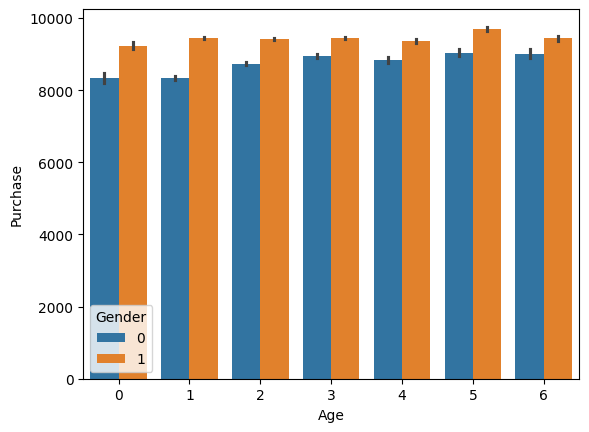

In [ ]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

PURCHASHING OF MEN IS HIGH THEN WOMEN

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

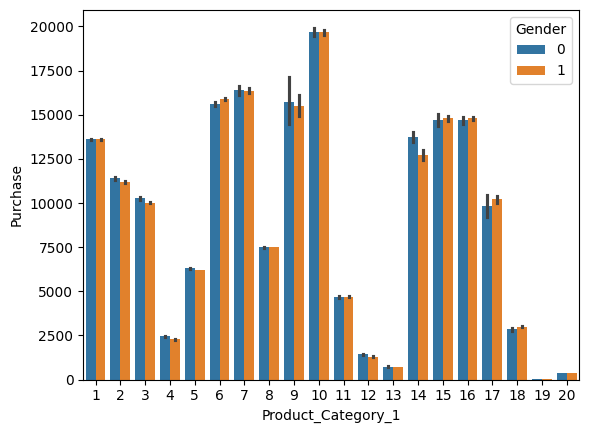

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df) # Use sns.barplot instead of plt.barplot

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

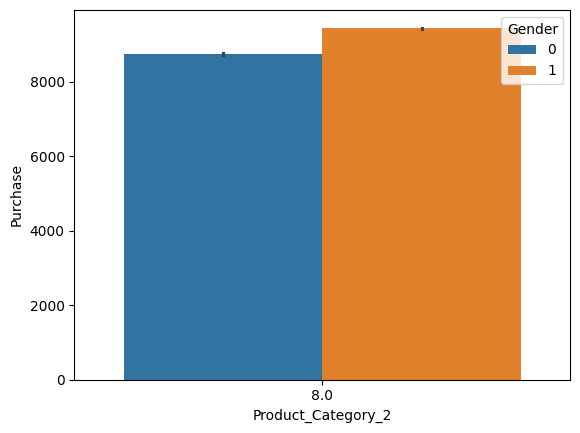

In [ ]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

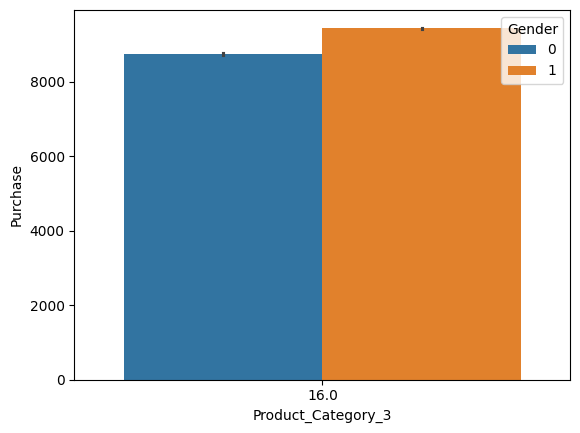

In [ ]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,8.0,16.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,8.0,16.0,1057.0,0,0
4,1000002,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
df.drop('User_ID', axis=1, inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,8.0,16.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,8.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
## feature scaling
df_test=df[df["Purchase"].isnull()]

In [ ]:
df_train=df[~df['Purchase'].isnull()]

In [ ]:
X=df_train.drop("Purchase",axis=1)

In [ ]:
X=df_train[:-1]

In [ ]:
X.shape

(550068, 11)

In [ ]:
y=df_train['Purchase']

In [ ]:
y.shape

(550068,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [ ]:
## feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## **DAY 3**

Flight Price Prediction(EDA + Feature Engineering)

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df=pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
final_df= pd.concat([train_df,test_df])
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [8]:
|## Featuring engineering process
##Fetaure Engineering Process
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [10]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [12]:
final_df.drop("Date_of_Journey",axis=1,inplace=True)

In [16]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
